In [26]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

### national data

In [3]:
file_paths = glob.glob('names/yob*.txt')

dfs = []

for file_path in file_paths:
    temp_df = pd.read_csv(file_path, names=['name', 'sex', 'count'])
    year = int(file_path.split('yob')[1].split('.txt')[0])
    temp_df['year'] = year
    dfs.append(temp_df)

dfn = pd.concat(dfs, ignore_index=True)

dfn['year'] = dfn['year'].astype(int)

dfn.head()

,name,sex,count,year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17998,2000
4,Sarah,F,17712,2000


### state data

In [4]:
file_paths = glob.glob('namesbystate/STATE.*.TXT')

dflist = []

for file_path in file_paths:
    temp_df = pd.read_csv(file_path, names=['state', 'sex', 'year', 'name','count'])
    dflist.append(temp_df)

dfs = pd.concat(dflist, ignore_index=True)
dfs.head()

,state,sex,year,name,count
0,ID,F,1910,Mary,53
1,ID,F,1910,Dorothy,31
2,ID,F,1910,Helen,30
3,ID,F,1910,Margaret,24
4,ID,F,1910,Ruth,24


### check values - state data

In [10]:
len(dfs['state'].unique())

51

In [11]:
dfs['sex'].unique()

array(['F', 'M'], dtype=object)

In [15]:
np.sort(dfs['year'].unique())

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

In [23]:
len(dfs['name'].unique())

32722

### check values - national data

In [27]:
dfn['sex'].unique()

array(['F', 'M'], dtype=object)

In [16]:
np.sort(dfn['year'].unique())

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [26]:
len(dfn['name'].unique())

102449

### compare counts

In [17]:
dfn[['count']].sum()

count    365296191
dtype: int64

In [18]:
dfs[['count']].sum()

count    322578957
dtype: int64

In [19]:
print('state counts / national counts: ', dfs[['count']].sum() / dfn[['count']].sum())

state counts / national counts:  count    0.883061
dtype: float64


In [8]:
national2022 = dfn[dfn['year']==2022]['count'].sum()
state2022 = dfs[dfs['year']==2022]['count'].sum()
print('ration of state records to national, for just 2022: ',state2022 / national2022)

for just 2022:  0.8351299385822762


In [9]:
national1950 = dfn[dfn['year']==1950]['count'].sum()
state1950 = dfs[dfs['year']==1950]['count'].sum()
print('ration of state records to national, for just 1950: ',state1950 / national1950)

for just 1950:  0.9505686469502233


## plots

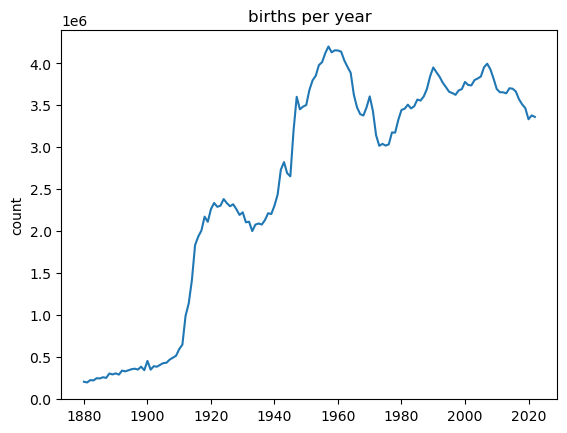

In [30]:
z = dfn[['year', 'count']].groupby(['year']).sum().reset_index()

plt.plot(z['year'], z['count'])
plt.ylabel('count')
plt.title('births per year')
plt.show()

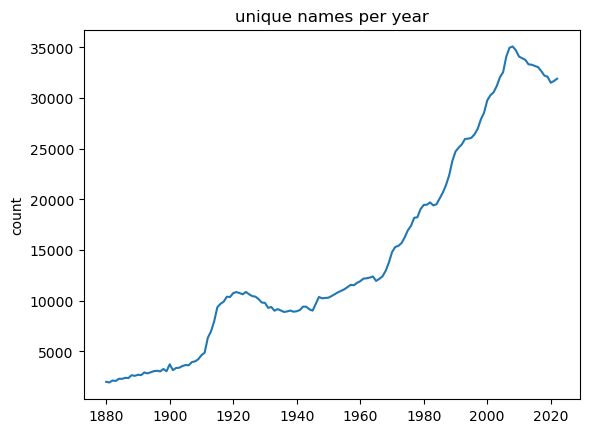

In [36]:
z = dfn[['sex', 'name', 'year']].groupby(['sex', 'name', 'year']).head()
z = z.groupby(['year']).count().reset_index()
plt.plot(z['year'], z['name'])
plt.ylabel('count')
plt.title('unique names per year')
plt.show()


## Karens per year

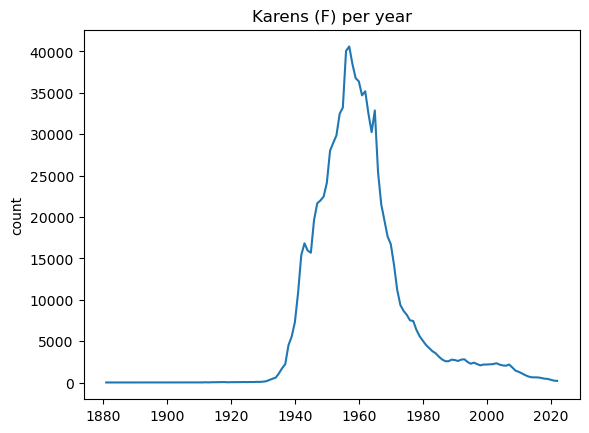

In [61]:
name, sex = 'Karen', 'F'

z = dfn.loc[(dfn['name']==name) & (dfn['sex']==sex)].sort_values(['year'])
plt.plot(z['year'], z['count'])
plt.ylabel('count')
plt.title(name + 's (' + sex + ') per year')
plt.show()


## plot number of unique names versus number of births

## what names are both M and F? what names have shifted one way or the other?

## has the typical length of names changed over time? (or the distribution?)